From https://astroquery.readthedocs.io/en/latest/gaia/gaia.html

In [161]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

In [162]:
coord = SkyCoord(ra=82.5, dec=-5.5, unit=(u.degree, u.degree), frame='fk5') #5:30:00 -5:30:00
width = u.Quantity(8, u.arcmin)
height = u.Quantity(8, u.arcmin)
r = Gaia.query_object_async(coordinate=coord, width=width, height=height)
#Gaia.query_object_async returns an astropy table
r.pprint()

Query finished.
         dist             solution_id     ... epoch_photometry_url
                                          ...                     
--------------------- ------------------- ... --------------------
0.0094760755124202976 1635721458409799680 ...                   --
 0.011083752929107861 1635721458409799680 ...                   --
 0.011591079490838334 1635721458409799680 ...                   --
  0.01186019028344836 1635721458409799680 ...                   --
 0.011942703694932924 1635721458409799680 ...                   --
 0.012379501743317549 1635721458409799680 ...                   --
  0.01442012288970374 1635721458409799680 ...                   --
 0.016608741056483221 1635721458409799680 ...                   --
  0.01703497710568427 1635721458409799680 ...                   --
 0.018443562847238724 1635721458409799680 ...                   --
                  ...                 ... ...                  ...
 0.079192902374704763 1635721458409799680 ... 

In [163]:
#print(r.columns)
for column in (r.columns):
   print(column)

dist
solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
astrometric_weight_al
astrometric_pseudo_colour
astrometric_pseudo_colour_error
mean_varpi_factor_al
astrometric_matched_observations
visibility_periods_used
astrometric_sigma5d_max
frame_rotator_object_type
matched_observations
duplicated_source
phot_g_n_obs
phot_g_mean_flux
phot_g_mean_flux_error
phot_g_mean_flux_over_error
phot_g_mean_mag
phot_bp_n_obs
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_bp_mean_flux_over_error
phot_bp_me

In [164]:
print,r['ra'],r['dec'],r['ref_epoch']

(<function print>,
 <MaskedColumn name='ra' dtype='float64' unit='deg' format='{!r:>}' description='Right ascension' length=216>
 82.501439520374973
 82.494167469339402
 82.511298238542111
 82.488086471868527
 82.488415451226786
 82.499056468026851
 82.507762600648277
 82.502452286282789
 82.495316499613807
 82.518357028417412
 82.486809625862236
 82.503006810574576
                ...
 82.438023783242713
 82.438184452683799
 82.440329891760669
 82.433853169829533
 82.543979198638226
 82.563846998656203
 82.434641081846578
 82.554556540490665
 82.561496003396925
 82.564326672125489
 82.563716451511496
 82.435532386679029,
 <MaskedColumn name='dec' dtype='float64' unit='deg' format='{!r:>}' description='Declination' length=216>
 -5.4906328877367034
 -5.4905584356372934
 -5.4971937605165451
 -5.5001893474983223
 -5.4968921809620443
 -5.4876561768172278
 -5.4878248487107664
 -5.5164283894681025
 -5.4836153676650179
 -5.5025063050748209
 -5.4865516931050831
 -5.4801944273012255
           

In [165]:
%matplotlib inline

In [166]:
from astropy.io import fits
hdul = fits.open('SkyMapper_i_20150910182831-15_82.500-5.500_300x300.fits')

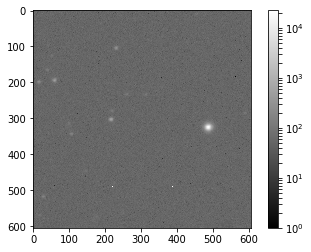

In [167]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.figure()
plt.imshow(hdul[0].data, cmap='gray',norm=LogNorm())
plt.colorbar()

In [168]:
ax.scatter(r['ra'],r['dec'], transform=ax.get_transform('fk5'), s=300,
           edgecolor='white', facecolor='none')

In [169]:
# The following line makes it so that the zoom level no longer changes,
# otherwise Matplotlib has a tendency to zoom out when adding overlays.
ax.set_autoscale_on(False)

# Add a rectangle with bottom left corner at pixel position (30, 50) with a
# width and height of 60 and 50 pixels respectively.
from matplotlib.patches import Rectangle
rect = Rectangle((30., 50.), 60., 50., edgecolor='yellow', facecolor='none')
ax.add_patch(rect)

KeyError: 'ra'

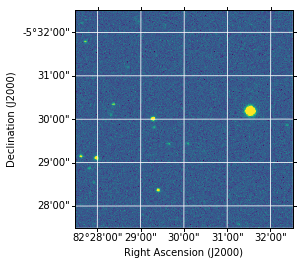

In [174]:
#from http://docs.astropy.org/en/stable/visualization/wcsaxes/index.html
import matplotlib.pyplot as plt

from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

filename = get_pkg_data_filename('SkyMapper_i_20150910182831-15_82.500-5.500_300x300.fits')
hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

plt.subplot(projection=wcs)
plt.imshow(hdu.data, vmin=-2.e-5, vmax=2.e2, origin='lower')
plt.grid(color='white', ls='solid')
plt.xlabel('Right Ascension (J2000)')
plt.ylabel('Declination (J2000)')

plt.scatter(r['ra'], r['dec'], transform=ax.get_transform('fk5'), s=100, edgecolor='white', facecolor='none')#(1, 1, 1, 0.5))

In [175]:
from astroquery.vizier import Vizier 
import astropy.units as u 
import astropy.coordinates as coord
def gaia_query(ra_deg, dec_deg, rad_deg, maxmag=20, 
               maxsources=10000): 
    """
    Query Gaia DR2 @ VizieR using astroquery.vizier
    parameters: ra_deg, dec_deg, rad_deg: RA, Dec, field 
                                          radius in degrees
                maxmag: upper limit G magnitude (optional)
                maxsources: maximum number of sources
    returns: astropy.table object
    """
    vquery = Vizier(columns=['Source', 'RA_ICRS', 'DE_ICRS', 
                             'phot_g_mean_mag'], 
                    column_filters={"phot_g_mean_mag": 
                                    ("<%f" % maxmag)}, 
                    row_limit = maxsources) 
 
    field = coord.SkyCoord(ra=ra_deg, dec=dec_deg, 
                           unit=(u.deg, u.deg), 
                           frame='fk5')
    return vquery.query_region(field, 
                               width=("%fd" % rad_deg), 
#                               catalog="I/337/gaia")[0] #Gaia DR1
                               catalog="I/345/gaia2")[0] 

In [176]:
# Example query
r=gaia_query(82.5, -5.5, 0.05)
#print,r['RA_ICRS'],r['DE_ICRS']
gc = SkyCoord(r['RA_ICRS'], r['DE_ICRS'], frame='icrs',equinox='J2015.5')
gc.transform_to('fk5')
print,gc

(<function print>, <SkyCoord (ICRS): (ra, dec) in deg
     [( 82.4999672 , -5.52056771), ( 82.50245229, -5.51642839),
      ( 82.47602675, -5.52437266), ( 82.48841545, -5.49689218),
      ( 82.48808647, -5.50018935), ( 82.47834726, -5.5198134 ),
      ( 82.48258022, -5.52405791), ( 82.48939941, -5.52443829),
      ( 82.51835703, -5.50250631), ( 82.52344012, -5.51508458),
      ( 82.50143952, -5.49063289), ( 82.5077626 , -5.48782485),
      ( 82.49416747, -5.49055844), ( 82.48680963, -5.48655169)]>)

AttributeError: module 'matplotlib.pyplot' has no attribute 'get_transform'

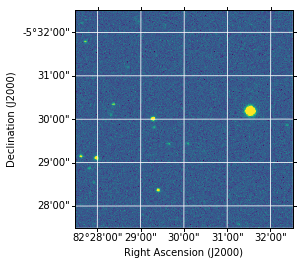

In [178]:
#from http://docs.astropy.org/en/stable/visualization/wcsaxes/index.html
import matplotlib.pyplot as plt

from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

filename = get_pkg_data_filename('SkyMapper_i_20150910182831-15_82.500-5.500_300x300.fits')
hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

plt.subplot(projection=wcs)
plt.imshow(hdu.data, vmin=-2.e-5, vmax=2.e2, origin='lower')
plt.grid(color='white', ls='solid')
plt.xlabel('Right Ascension (J2000)')
plt.ylabel('Declination (J2000)')


#plt.scatter(r['RA_ICRS'], r['DE_ICRS'], s=100, edgecolor='white', facecolor='none')#(1, 1, 1, 0.5))
#plt.scatter(gc.ra, gc.dec, s=100, edgecolor='white', facecolor='none')#(1, 1, 1, 0.5))
ax.scatter(82.5*u.deg, -4.5*u.deg, transform=plt.get_transform('fk5'),s=300, edgecolor='white', facecolor='none')#(1, 1, 1, 0.5))
plt.show()


In [147]:
print,gc.ra

(<function print>,
 <Longitude [ 82.4999672 , 82.50245229, 82.47602675, 82.48841545,
              82.48808647, 82.47834726, 82.48258022, 82.48939941,
              82.51835703, 82.52344012, 82.50143952, 82.5077626 ,
              82.49416747, 82.48680963] deg>)